# Themis Data
In this notebook we will look at part of the Themis day time IR control network.

Using cnettable, I dumped out the Memnonia day time IR network into a CSV. We will load it into a Panda's data frame and do some basic analysis. We will also use matplotlib to do some simple plotting.

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

## Pandas

### Load Data into a Data Frame
The CSV file is 730 MB so it is not included in the git repo

In [2]:
data_file = '/work/projects/progteam/jmapel/ipce/cnethealth/themis_tests/Memnonia_DayIR_Final.csv'

In [3]:
df = pd.read_csv(data_file, low_memory=False)

### Look at the Data!
In an ipython notebook we can look at the first few control measures and see what data is in our csv

In [4]:
pd.set_option('display.max_columns',200)
df.head(3)

,ControlPointId,PointType,ChooserName,DateTime,EditLock,Ignored,AprioriSurfacePointSource,AprioriSurfacePointSourceFile,AprioriRadiusSource,AprioriRadiusSourceFile,AprioriX,AprioriY,AprioriZ,AprioriXSigma,AprioriYSigma,AprioriZSigma,AprioriLatitude,AprioriLongitude,AprioriLocalRadius,AprioriLatitudeSigma,AprioriLongitudeSigma,AprioriLocalRadiusSigma,AprioriLatitudeSigmaDistance,AprioriLongitudeSigmaDistance,AdjustedX,AdjustedY,AdjustedZ,AdjustedXSigma,AdjustedYSigma,AdjustedZSigma,AdjustedLatitude,AdjustedLongitude,AdjustedLocalRadius,AdjustedLatitudeSigma,AdjustedLongitudeSigma,AdjustedLocalRadiusSigma,AdjustedLatitudeSigmaDistance,AdjustedLongitudeSigmaDistance,MinimumResidual,MaximumResidual,AverageResidual,MinimumSampleResidual,MaximumSamlpeResidual,MinimumLineResidual,MaximumLineResidual,MaximumSampleShift,MinimumSampleShift,AverageSampleShift,MaximumLineShift,MinimumLineShift,AverageLineShift,MaximumPixelShift,MinimumPixelShift,AveragePixelShift,MinimumPixelZScore,AveragePixelZScore,MaximumGoodnessOfFit,MinimumGoodnessOfFit,AverageGoodnessOfFit,AprioriLine,AprioriSample,ChooserName.1,CubeSerialNumber,DateTime.1,Line,LineResidual,LineSigma,Sample,SampleResidual,SampleSigma,ResidualMagnitude,MeasureType,Filename,Sample.1,Line.1,PixelValue,RightAscension,Declination,PlanetocentricLatitude,PlanetographicLatitude,PositiveEast360Longitude,PositiveEast180Longitude,PositiveWest360Longitude,PositiveWest180Longitude,BodyFixedCoordinateX,BodyFixedCoordinateY,BodyFixedCoordinateZ,LocalRadius,SampleResolution,LineResolution,SpacecraftPositionX,SpacecraftPositionY,SpacecraftPositionZ,SpacecraftAzimuth,SlantDistance,TargetCenterDistance,SubSpacecraftLatitude,SubSpacecraftLongitude,SpacecraftAltitude,OffNadirAngle,SubSpacecraftGroundAzimuth,SunPositionX,SunPositionY,SunPositionZ,SubSolarAzimuth,SolarDistance,SubSolarLatitude,SubSolarLongitude,SubSolarGroundAzimuth,Phase,Incidence,Emission,NorthAzimuth,EphemerisTime,UTC,LocalSolarTime,SolarLongitude,LookDirectionBodyFixedX,LookDirectionBodyFixedY,LookDirectionBodyFixedZ,LookDirectionJ2000X,LookDirectionJ2000Y,LookDirectionJ2000Z,LookDirectionCameraX,LookDirectionCameraY,LookDirectionCameraZ,ObliqueDetectorResolution,ObliquePixelResolution,ObliqueLineResolution,ObliqueSampleResolution
0,THM_AEOLIS_auto_005864,Free,autoseed,2016-01-25T12:17:42,0,0,AverageOfMeasures,NaN,AverageOfMeasures,NaN,-3357.442989,-17.513863,-498.383712,NaN,NaN,NaN,-8.443299,180.298877,3394.277019,NaN,NaN,NaN,NaN,NaN,-3357.418882,-17.596168,-498.542888,0.007658,0.052088,0.051548,-8.446016,180.300283,3394.276975,0.00088,0.000889,0.00005,0.052142,0.053267,0.068475,0.239153,0.139733,-0.238899,0.161625,-0.080435,0.151753,0.183847,-0.701088,-0.233456,2.439349,-2.731701,-0.512224,2.731708,0.0,1.369191,5.936862,-1.557291,0.852197,0.370007,0.648132,11019.400,288.972,jigsaw,Odyssey/THEMIS_IR/748341368.128,2016-01-25T12:17:42,11021.900,-0.080435,NaN,289.156,-0.072349,NaN,0.108186,RegisteredSubPixel,/work/projects/themis_control/Completed_Tiles/...,289.156099,11021.877482,0.00026570979,54.350537,17.532796,-8.448317,-8.547182,180.298908,-179.701092,179.701092,179.701092,-3357.403002,-17.515498,-498.678282,3.394281e+06,98.262048,98.262048,-3751.893501,-5.080475,-568.153313,138.641403,400.754493,3794.671111,-8.610932,180.077585,400.382434,2.252338,233.372854,-5.728867e+07,1.786615e+08,-8.745403e+07,152.568218,1.383720,-24.991112,107.778697,246.389084,68.134145,70.609861,2.525010,262.313363,1.171465e+08,2003-09-18T08:40:10.3049731,16.834681,262.987756,0.984369,-0.031029,0.173361,0.555749,0.774848,0.301252,0.031873,-0.020822,0.999275,98.357545,98.357545,98.357545,98.357545
1,THM_AEOLIS_auto_005864,Free,autoseed,2016-01-25T12:17:42,0,0,AverageOfMeasures,NaN,AverageOfMeasures,NaN,-3357.442989,-17.513863,-498.383712,NaN,NaN,NaN,-8.443299,180.298877,3394.277019,NaN,NaN,NaN,NaN,NaN,-3357.418882,-17.596168,-498.542888,0.007658,0.052088,0.051548,-8.446016,180.300283,3394.276975,0.00088,0.000889,0.00005,0.052142,0.053267,0.068475,0.239153,0

### Do some basic analysis
Pandas makes computing simple statistics simple

In [5]:
df[['Emission','Incidence','Phase']].describe()

,Emission,Incidence,Phase
count,387331.000000,387331.000000,387331.000000
mean,3.506981,65.464624,67.060860
std,5.392942,9.690053,8.237757
min,0.568224,37.632671,39.353062
25%,1.686382,60.564693,61.740512
50%,2.050228,65.413095,66.379163
75%,2.548854,71.089011,72.111060
max,30.983700,89.691176,92.420819


### Do some slightly more complex analysis
Using the output we got above we can dig a little bit deeper and look at some more complex things

In [6]:
df[df['Phase'].between(61, 72, inclusive=True)][['Emission','Incidence']].describe()

,Emission,Incidence
count,206901.000000,206901.000000
mean,3.717671,64.159946
std,5.905936,6.394010
min,0.957560,37.632671
25%,1.688640,62.673325
50%,2.045472,65.368193
75%,2.544657,67.898672
max,30.931467,74.768215


### Matplotlib

### Make some box plots
The changes in the distributions can be more easily viewed using box plots

{'whiskers': [<matplotlib.lines.Line2D at 0x2b344aa7b320>,
 'caps': [<matplotlib.lines.Line2D at 0x2b344aa7bbe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b344aa7b1d0>,
 'medians': [<matplotlib.lines.Line2D at 0x2b344aa86470>,
 'fliers': [],
 'means': []}

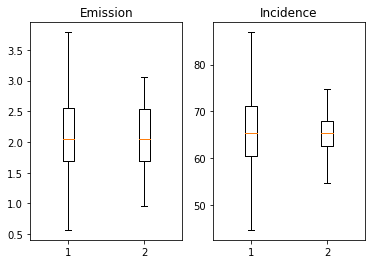

In [7]:
emission = df['Emission']
emission_filtered = df[df['Phase'].between(61, 72, inclusive=True)]['Emission']
incidence = df['Incidence']
incidence_filtered = df[df['Phase'].between(61, 72, inclusive=True)]['Incidence']
plt.subplot(1,2,1)
plt.title('Emission')
plt.boxplot([emission, emission_filtered], showfliers=False)
plt.subplot(1,2,2)
plt.title('Incidence')
plt.boxplot([incidence, incidence_filtered], showfliers=False)

### Make some histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x2b34312359e8>,
      dtype=object)

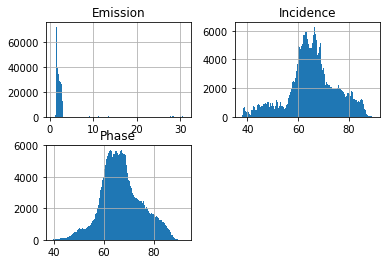

In [8]:
df[['Emission','Incidence','Phase']].hist(bins=200)

## NetworkX

Generating the graph
This is all copied from the Apollo notebook

In [9]:
import networkx as nx
from networkx.algorithms import bipartite

In [10]:
B = nx.Graph()
for index, row in df.iterrows():
    B.add_node(row['ControlPointId'],
               bipartite=0,
               point_type=row['PointType'],
               lat=row['AprioriLatitude'],
               lon=row['AprioriLongitude'],
               rad=row['AprioriLocalRadius'])
    B.add_node(row['CubeSerialNumber'],
               bipartite=1)
    B.add_edge(row['ControlPointId'],
               row['CubeSerialNumber'],
               measure_type=row['MeasureType'],
               sample=row['Sample'],
               line=row['Line'],
               sample_residual=row['SampleResidual'],
               line_residual=row['LineResidual'],
               phase=row['Phase'],
               incidence=row['Incidence'],
               emission=row['Emission'],
               image=row['CubeSerialNumber'])

In [12]:
points = {n for n, d in B.nodes(data=True) if d['bipartite']==0}
images = {n for n, d in B.nodes(data=True) if d['bipartite']==1}
print('Images: {}\nPoints: {}\nMeasures: {}'.format(len(images), len(points),len(B.edges())))

Images: 2170
Points: 71983
Measures: 387331


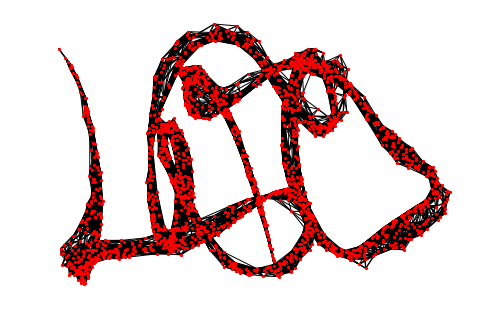

In [15]:
image_graph = bipartite.projected_graph(B, images)
nx.draw(image_graph,
        node_size=5)
plt.show()

In [16]:
point_pos = dict()
point_pos.update((node ,(B.node[node]['lat'], B.node[node]['lon'])) for node in points)

In [26]:
cmap = matplotlib.cm.get_cmap('Greens')
point_node_colors = [cmap(B.degree(node)/4) for node in points]

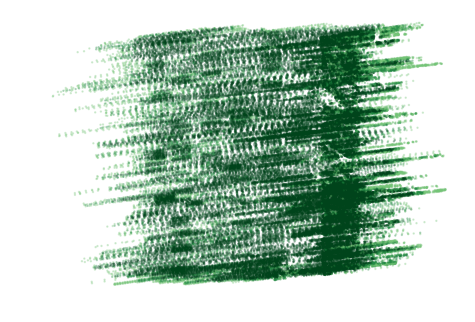

In [27]:
nx.draw(B,
        pos=point_pos,
        nodelist=points,
        edgelist=[],
        node_color=point_node_colors,
        alpha=0.25,
        node_size=2)
plt.show()

[Networkx bipartite centrality](https://networkx.github.io/documentation/stable/reference/algorithms/bipartite.html)

[Whole Tale](https://wholetale.org/)